You present your wind turbine solution to management, but they complain that you have located some factories in very expensive places. They ask you to try again, considering the cost to build and operate the factories (which varies by location). They are unsure how many factories to build.  
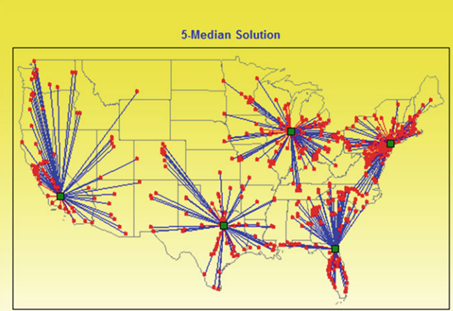

In [ ]:
fac = list(range(100))   # candidate factory locations
dem = list(range(1000))  # demand points

In [ ]:
# For convenience, pick the (annual) factory costs at random


In [ ]:
# For convenience, pick the factory locations at random
fac_x = [ random.random() for i in fac ]
fac_y = [ random.random() for i in fac ]

In [ ]:
# Draw the factory locations
import matplotlib.pyplot as plt

plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fac_x, fac_y)
plt.title('Candidate Sites')
plt.show()

In [ ]:
# Draw the demand point locations
dem_x = [ random.random() for i in dem ]
dem_y = [ random.random() for i in dem ]

plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(dem_x, dem_y)
plt.title('Demand Points')
plt.show()

In [ ]:
# Suppose that cost equals rectilinear distance
def rect_dist(x1,y1,x2,y2):
    return abs(x1-x2) + abs(y1-y2)

cost = { (i,j) : rect_dist( fac_x[i], fac_y[i], dem_x[j], dem_y[j] ) for i in fac for j in dem }

In [ ]:
# # Suppose that cost equals Chebyshev distance
# def cheb_dist(x1,y1,x2,y2):
#     return max( abs(x1-x2), abs(y1-y2) )

# cost = { (i,j) : cheb_dist( fac_x[i], fac_y[i], dem_x[j], dem_y[j] ) for i in fac for j in dem }

In [ ]:
# # Suppose that cost equals Euclidean distance
# import math
# def eucl_dist(x1,y1,x2,y2):
#     return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

# cost = { (i,j) : eucl_dist( fac_x[i], fac_y[i], dem_x[j], dem_y[j] ) for i in fac for j in dem }

In [ ]:
import gurobipy as gp
from gurobipy import GRB

In [ ]:
# create model 

# create variables, x[i,j] = 1 if facility i serves demand point j

# create variables, y[i] = 1 if locate a facility at site i


In [ ]:
# Objective: minimize transportation cost (annual) + factory cost (annual)


In [ ]:
# Constraints: each demand point should be covered by (assigned to) a factory

# Constraints: if no factory is built at site i, it can serve no demand point



In [ ]:
# force Gurobi to use concurrent method (primal simplex, dual simplex, barrier all at the same time!)

# solve


In [ ]:
medians = [ i for i in fac if y[i].x > 0.5 ]
medians_x = [ fac_x[i] for i in medians ]
medians_y = [ fac_y[i] for i in medians ]

plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(medians_x, medians_y)
plt.title('Best Factory Locations')
plt.show()

In [ ]:
# Draw the factory assignments
pallette = ['red', 'yellow', 'green', 'blue', 'purple']

k = len(medians)
for p in range(k):
    i = medians[p]
    assigned = [ j for j in dem if x[i,j].x > 0.5 ]
    assigned_x = [ dem_x[j] for j in assigned ]
    assigned_y = [ dem_y[j] for j in assigned ]
    plt.scatter(assigned_x, assigned_y, color=pallette[p])

plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Factory Assignments')
plt.show()